<a href="https://colab.research.google.com/github/LinYuanxi/ML/blob/main/%D0%9C%D0%9C%D0%9E_%D0%9B%D0%A03_%D0%BE%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2(feature_selection%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [11]:
wine_dataset = load_wine()
data = pd.DataFrame(wine_dataset.data,
                      columns=wine_dataset.feature_names)

In [3]:
lst_arr_1211 = [[1,2,1,21], [1,2,2,22], [1,2,3,23], [1,2,4,24], 
                [1,2,5,25], [1,2,6,26], [1,2,7,27], [1,1,8,28]]
arr_1211 = np.array(lst_arr_1211)
data_1211 = pd.DataFrame(arr_1211, columns=['f1', 'f2', 'f3', 'f4'])
data_1211

,f1,f2,f3,f4
0,1,2,1,21
1,1,2,2,22
2,1,2,3,23
3,1,2,4,24
4,1,2,5,25
5,1,2,6,26
6,1,2,7,27
7,1,1,8,28


In [4]:
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data_1211)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([0.      , 0.109375, 5.25    , 5.25    ])

In [5]:
# Константный и псевдоконстантный признаки удалены
selector_1211.transform(data_1211)

array([[ 1, 21],
       [ 2, 22],
       [ 3, 23],
       [ 4, 24],
       [ 5, 25],
       [ 6, 26],
       [ 7, 27],
       [ 8, 28]])

In [6]:
lst_arr_1212 = [[21,1,2,21,1,3,21], 
                [22,2,2,22,2,3,22], 
                [23,3,2,23,3,3,23], 
                [24,4,2,24,4,3,24]]
arr_1212 = np.array(lst_arr_1212)
data_1212 = pd.DataFrame(arr_1212, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
data_1212

,f1,f2,f3,f4,f5,f6,f7
0,21,1,2,21,1,3,21
1,22,2,2,22,2,3,22
2,23,3,2,23,3,3,23
3,24,4,2,24,4,3,24


In [7]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [8]:
get_duplicates(data_1212)

{'f1': ['f4', 'f7'], 'f2': ['f5'], 'f3': [], 'f6': []}

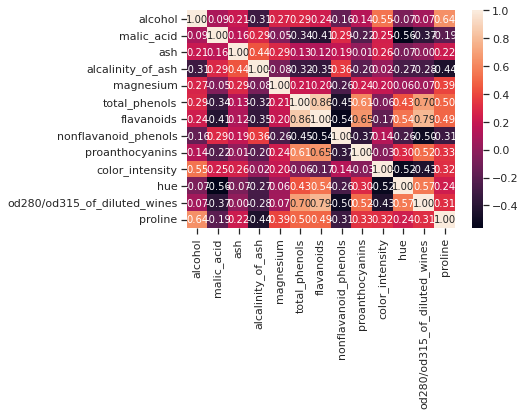

In [14]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [15]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [17]:
make_corr_df(data)

,f1,f2,corr
0,total_phenols,flavanoids,0.864564
1,flavanoids,total_phenols,0.864564


In [18]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [19]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['flavanoids', 'total_phenols']]

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
diabetes = load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target
diabetes_feature_names = diabetes['feature_names']
diabetes_x_df = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])

Text(0, 0.5, 'Взаимная информация')

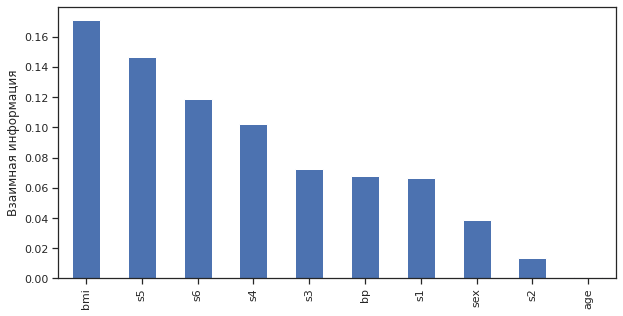

In [26]:
mi = mutual_info_regression(diabetes_X, diabetes_y)
mi = pd.Series(mi)
mi.index = diabetes_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [28]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(diabetes_X, diabetes_y)

list(zip(diabetes_feature_names, sel_mi.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', True),
 ('s2', False),
 ('s3', False),
 ('s4', True),
 ('s5', True),
 ('s6', True)]

Методы обертывания (wrapper methods)

In [45]:
!pip install Scikit-learn==0.20.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 8.7 MB/s 
  Attempting uninstall: Scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.4 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.4 which is incompatible.


In [46]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(wine_X, wine_y, custom_feature_names=wine_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 1079/1079

Best accuracy score: 0.94
Best subset (indices): (0, 5, 6, 9)
Best subset (corresponding names): ('alcohol', 'total_phenols', 'flavanoids', 'color_intensity')


In [50]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(wine_X, wine_y, custom_feature_names=wine_feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 91/91

Best accuracy score: 0.93
Best subset (indices): (6, 9)
Best subset (corresponding names): ('flavanoids', 'color_intensity')


Методы вложений (embedded methods)

In [55]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 1.41334920e+00,  4.66718035e+00,  1.82985032e+01,
        -2.42939991e+00,  1.26055359e-02,  4.68613806e-01,
         9.33614994e+00,  0.00000000e+00, -5.50614454e+00,
        -1.32071634e+00, -5.83797139e+00,  1.97920879e+00,
         6.39909145e-02],
       [-5.94176493e-01, -2.92845801e+00, -1.33359876e+01,
         1.20169737e+00, -4.92133181e-02,  1.05136658e+00,
         2.19592052e+00,  1.05799119e+01,  3.15989185e+00,
        -5.34592136e+00,  1.86190133e+01, -3.18118476e+00,
        -3.52899721e-02],
       [ 2.89017626e-01,  1.54936167e+00,  1.60601835e+00,
         1.34927121e-01,  4.41698641e-02, -3.57511137e-01,
        -8.39357634e+00, -7.76433231e+00, -3.08962478e+00,
         1.96695507e+00, -7.48810600e+00, -4.46354835e+00,
         4.36201888e-03]])

In [56]:
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_X, wine_y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [57]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.        ,  0.        , -0.10348578, -0.01158846,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00371447],
       [ 0.        ,  0.        ,  0.        ,  0.0387936 ,  0.01405573,
         0.        ,  0.        ,  0.        ,  0.        , -0.21009731,
         0.        ,  0.        , -0.00195771],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.00432849,
         0.        , -0.20464896,  0.        ,  0.        ,  0.20767533,
         0.        ,  0.        , -0.00088091]])

In [59]:
# Признак 4 исключен
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(wine_X, wine_y)
sel_e_lr2.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True])

In [60]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(diabetes_X, diabetes_y)
# Коэффициенты регрессии
list(zip(diabetes_feature_names, e_ls1.coef_))

[('age', 0.0),
 ('sex', -0.0),
 ('bmi', 367.7018520698162),
 ('bp', 6.301904186054684),
 ('s1', 0.0),
 ('s2', 0.0),
 ('s3', -0.0),
 ('s4', 0.0),
 ('s5', 307.60570000448166),
 ('s6', 0.0)]

In [63]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(diabetes_X, diabetes_y)
list(zip(diabetes_feature_names, sel_e_ls1.get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [64]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(wine_X, wine_y)
rfc1.fit(wine_X, wine_y)
gbc1.fit(wine_X, wine_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.01257056, 0.        , 0.01422316, 0.        , 0.        ,
        0.        , 0.16704836, 0.        , 0.        , 0.03297845,
        0.05818509, 0.31204257, 0.4029518 ]), 1.0)

In [65]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

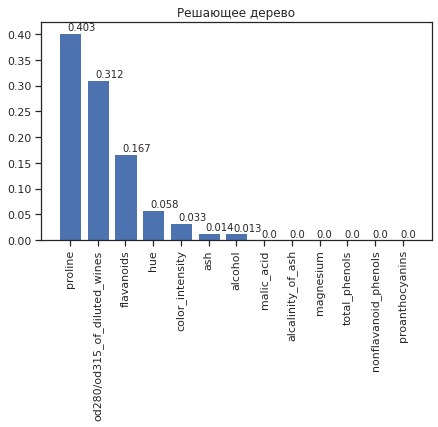

In [67]:
_,_=draw_feature_importances(dtc1, wine_x_df, 'Решающее дерево')

In [70]:
list(zip(wine_feature_names, SelectFromModel(dtc1).fit(wine_X, wine_y).get_support()))

[('alcohol', False),
 ('malic_acid', False),
 ('ash', False),
 ('alcalinity_of_ash', False),
 ('magnesium', False),
 ('total_phenols', False),
 ('flavanoids', True),
 ('nonflavanoid_phenols', False),
 ('proanthocyanins', False),
 ('color_intensity', False),
 ('hue', True),
 ('od280/od315_of_diluted_wines', True),
 ('proline', True)]

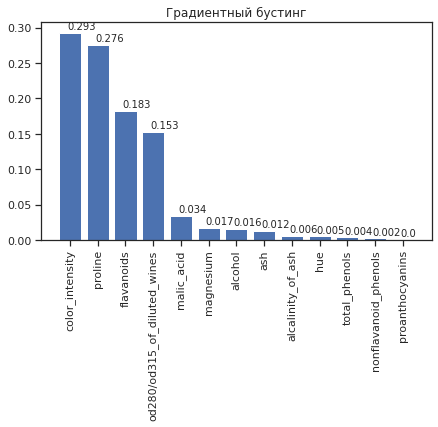

In [72]:
_,_=draw_feature_importances(gbc1, wine_x_df, 'Градиентный бустинг')

In [73]:
list(zip(wine_feature_names, SelectFromModel(gbc1).fit(wine_X, wine_y).get_support()))

[('alcohol', False),
 ('malic_acid', False),
 ('ash', False),
 ('alcalinity_of_ash', False),
 ('magnesium', False),
 ('total_phenols', False),
 ('flavanoids', True),
 ('nonflavanoid_phenols', False),
 ('proanthocyanins', False),
 ('color_intensity', True),
 ('hue', False),
 ('od280/od315_of_diluted_wines', True),
 ('proline', True)]

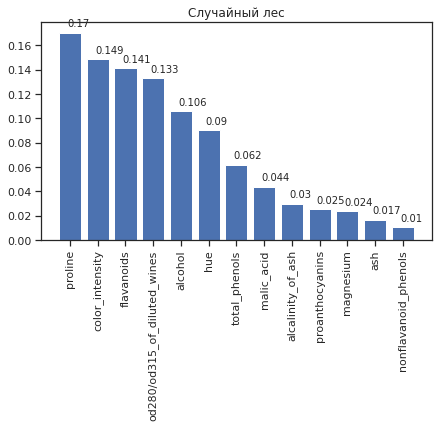

In [74]:
_,_=draw_feature_importances(rfc1, wine_x_df, 'Случайный лес')

In [75]:
list(zip(wine_feature_names, SelectFromModel(rfc1).fit(wine_X, wine_y).get_support()))

[('alcohol', True),
 ('malic_acid', False),
 ('ash', False),
 ('alcalinity_of_ash', False),
 ('magnesium', False),
 ('total_phenols', False),
 ('flavanoids', True),
 ('nonflavanoid_phenols', False),
 ('proanthocyanins', False),
 ('color_intensity', True),
 ('hue', True),
 ('od280/od315_of_diluted_wines', True),
 ('proline', True)]

In [76]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(diabetes_X, diabetes_y)
rfr1.fit(diabetes_X, diabetes_y)
gbr1.fit(diabetes_X, diabetes_y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.0419363 , 0.00911131, 0.23678882, 0.07857539, 0.08079356,
        0.05180663, 0.07091761, 0.01817218, 0.3466698 , 0.06522838]),
 1.0000000000000002)

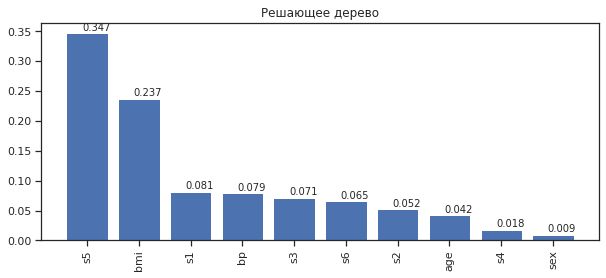

In [77]:
_,_=draw_feature_importances(dtr1, diabetes_x_df, 'Решающее дерево', figsize=(10,4))

In [78]:
list(zip(diabetes_feature_names, SelectFromModel(dtr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

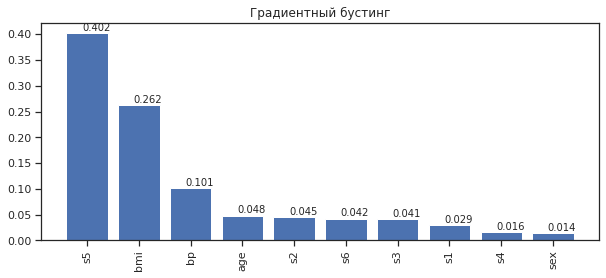

In [79]:
_,_=draw_feature_importances(gbr1, diabetes_x_df, 'Градиентный бустинг', figsize=(10,4))

In [80]:
list(zip(diabetes_feature_names, SelectFromModel(gbr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [81]:
list(zip(diabetes_feature_names, SelectFromModel(gbr1, threshold='0.25*mean').fit(diabetes_X, diabetes_y).get_support()))

[('age', True),
 ('sex', False),
 ('bmi', True),
 ('bp', True),
 ('s1', True),
 ('s2', True),
 ('s3', True),
 ('s4', False),
 ('s5', True),
 ('s6', True)]

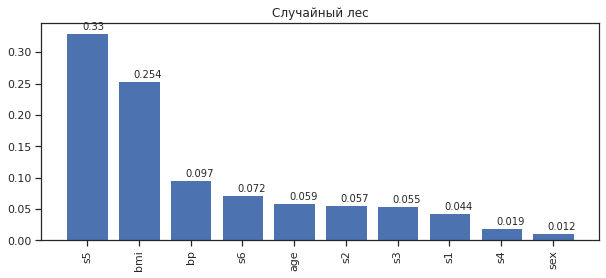

In [82]:
_,_=draw_feature_importances(rfr1, diabetes_x_df, 'Случайный лес', figsize=(10,4))

In [83]:
list(zip(diabetes_feature_names, SelectFromModel(rfr1).fit(diabetes_X, diabetes_y).get_support()))

[('age', False),
 ('sex', False),
 ('bmi', True),
 ('bp', False),
 ('s1', False),
 ('s2', False),
 ('s3', False),
 ('s4', False),
 ('s5', True),
 ('s6', False)]

In [84]:
list(zip(diabetes_feature_names, SelectFromModel(rfr1, threshold='0.1*mean').fit(diabetes_X, diabetes_y).get_support()))

[('age', True),
 ('sex', True),
 ('bmi', True),
 ('bp', True),
 ('s1', True),
 ('s2', True),
 ('s3', True),
 ('s4', True),
 ('s5', True),
 ('s6', True)]